In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')
master = train.copy()

In [395]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [396]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


train.describe().loc['mean'] - train.describe().loc['50%']

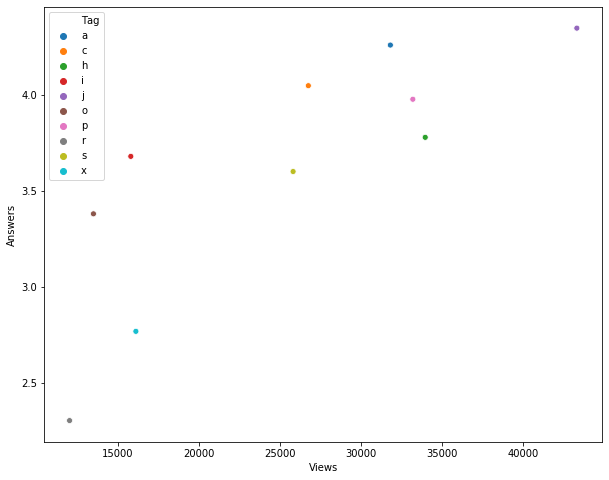

In [4]:
df = train.groupby('Tag').mean().reset_index()
plt.figure(figsize=(10,8))
sns.scatterplot(df['Views'],df['Answers'],hue=df['Tag'])

<BarContainer object of 10 artists>

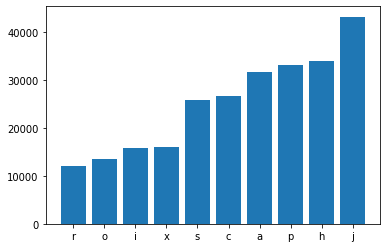

In [5]:
df1 = train.groupby('Tag')['Views'].mean().sort_values().to_frame().reset_index()
plt.bar(df1['Tag'],df1['Views'])

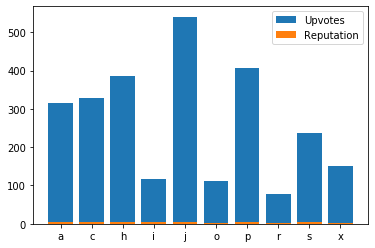

In [6]:
df2 = train.groupby('Tag')['Answers'].mean().sort_values().to_frame().reset_index()
plt.bar(df['Tag'],df['Upvotes'],label='Upvotes')
#plt.bar(df1['Tag'],df1['Views'],label='Views')
plt.bar(df2['Tag'],df2['Answers'],label='Reputation')
plt.legend()

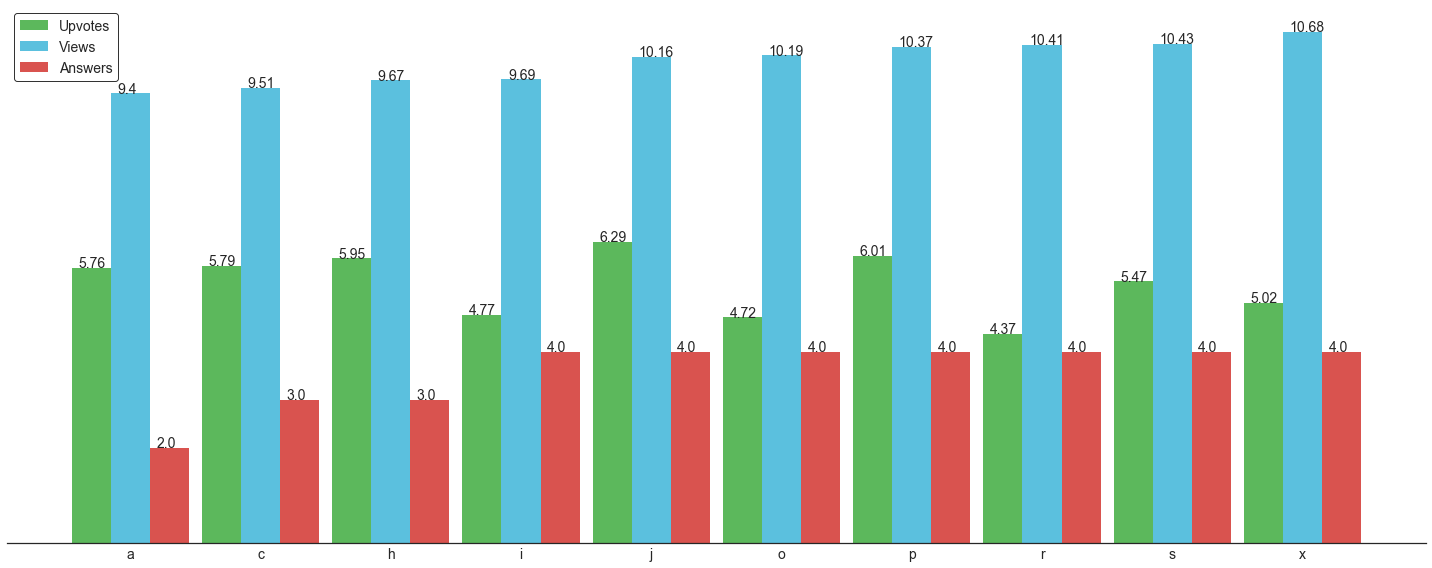

In [372]:
fig , ax = plt.subplots(figsize=(20,8))
width = 0.3
indx = np.arange(len(df['Tag']))
plt.style.use('seaborn-white')
VR = round(np.log(df['Upvotes']),2)
SR = round(np.log(df1['Views']),2)
NR = round((df2['Answers']))

ax.bar(indx-width,height=VR,width=width,label='Upvotes',color='#5cb85c')
ax.bar(indx,height=SR,width=width,label = 'Views',color='#5bc0de')
ax.bar(indx+width,height=NR,width=width,label='Answers',color='#d9534f')

xloc1 = [i-0.4 for i in range(0,len(indx))]
xloc2 = [i-0.1 for i in range(0,len(indx))]
xloc3 = [i+0.2 for i in range(0,len(indx))]

for x1,y1 in enumerate(VR):
    ax.text(xloc1[x1],y1+0.01,str(y1),fontdict={'fontsize':'14'})
for x1,y1 in enumerate(SR):
    ax.text(xloc2[x1],y1+0.01,str(y1),fontdict={'fontsize':'14'})
for x1,y1 in enumerate(NR):
    ax.text(xloc3[x1],y1+0.01,str(y1),fontdict={'fontsize':'14'})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xticks(ticks=indx,labels=df['Tag'],fontsize=14);
plt.yticks([])
#plt.xlabel(fontsize=14)
plt.tight_layout()
leg = plt.legend(fontsize=14,frameon=True)
leg.get_frame().set_edgecolor('black')
#plt.ylim(0,1)
#plt.title('Percentage of the respondent\'s interest Data Science Areas',fontsize=16);
plt.show()


In [7]:
train.corr()['Upvotes'].sort_values()

Username     -0.011970
ID            0.006328
Answers       0.202033
Reputation    0.266710
Views         0.437336
Upvotes       1.000000
Name: Upvotes, dtype: float64

In [3]:
train['Watched'] = train['Answers'].apply(lambda x: 1 if x>4 else 0)
test['Watched'] = test['Answers'].apply(lambda x: 1 if x>4 else 0)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [4]:
x = pd.concat([train,pd.get_dummies(train['Tag'])],axis=1)
xtest = pd.concat([test,pd.get_dummies(test['Tag'])],axis=1)

In [5]:
#x = pd.concat([train,pd.get_dummies(test['Tag'])])
x.drop(['Tag','Username','ID','Upvotes'],axis=1,inplace=True)
y = train['Upvotes']  

In [6]:
xt = xtest.drop(['Username','ID','Tag'],axis=1)

In [7]:
xt

,Reputation,Answers,Views,Watched,a,c,h,i,j,o,p,r,s,x
0,5645.0,3.0,33200.0,0,1,0,0,0,0,0,0,0,0,0
1,24511.0,6.0,2730.0,1,0,1,0,0,0,0,0,0,0,0
2,927.0,1.0,21167.0,0,0,0,0,1,0,0,0,0,0,0
3,21.0,6.0,18528.0,1,0,0,0,1,0,0,0,0,0,0
4,4475.0,10.0,57240.0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141443,4681.0,4.0,2469.0,0,0,0,0,0,1,0,0,0,0,0
141444,7782.0,3.0,18998.0,0,0,0,0,0,1,0,0,0,0,0
141445,435.0,5.0,57048.0,1,0,0,0,0,0,0,1,0,0,0
141446,176.0,3.0,10193.0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LassoLars
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
sc = StandardScaler()
x_lin = sc.fit_transform(x)
pl = PolynomialFeatures(degree=2)
x_poly = pl.fit_transform(x_lin)

In [10]:
sc = StandardScaler()
xtest = sc.fit_transform(xt)
#pl = PolynomialFeatures(degree=2)
#xtest = pl.fit_transform(x_ft)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.22, random_state=205)

In [19]:
gb = GradientBoostingRegressor().fit(X_train,y_train)

In [20]:
y_gb = gb.predict(X_test)
r2_score(y_test,y_gb)

0.7866159828681072

In [413]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [414]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
y_knn = knn.predict(X_test)
print(r2_score(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))

0.609888822290618
3971299.763815452


In [415]:
import xgboost

In [416]:
xgb = xgboost.XGBRFRegressor()

In [417]:
xgb = xgboost.XGBRFRegressor()
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)
r2_score(y_test,y_xgb)

0.8465039263103912

In [418]:
ytest = xgb.predict(xtest)
sub = pd.concat([test['ID'],pd.DataFrame(ytest,columns=['Upvotes'])],axis=1)
sub.to_csv('submission.csv',index=False)

In [358]:
from sklearn.ensemble import RandomForestRegressor 

In [359]:
rf = RandomForestRegressor(n_estimators=13).fit(X_train,y_train)
y_rf = rf.predict(X_test)
print(r2_score(y_test,y_rf))

0.8713914075237236


In [360]:
file(rf,xtest)

In [320]:
def file(model,xtest):
    ytest = model.predict(xtest)
    sub = pd.concat([test['ID'],pd.DataFrame(ytest,columns=['Upvotes'])],axis=1)
    sub.to_csv('submission.csv',index=False)

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_dtr = dtr.predict(X_test)
r2_score(y_test,y_dtr)

0.6584503464552633

In [74]:
from sklearn.model_selection import cross_validate,KFold

In [75]:
c = cross_validate(xgb,X_train,y_train)

In [76]:
c

{'fit_time': array([10.66435575, 11.47677016, 12.50045061, 12.40775466, 12.41143084]),
 'score_time': array([0.11170173, 0.14147568, 0.14059043, 0.12965155, 0.14062309]),
 'test_score': array([0.81598146, 0.81853121, 0.82105162, 0.81810748, 0.81903214])}

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
model = keras.Sequential()

model.add(layers.Dense(5, activation="relu", name="layer1"))
model.add(layers.Dense(6, activation="relu", name="layer2"))
#model.add(layers.Dense(14, activation="relu", name="layer2"))
model.add(layers.Dense(1,name='layer3'))

In [110]:
model.compile(loss='mse', optimizer='rmsprop',metrics=['accuracy'])

In [111]:
print("Fit model on training data")
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    batch_size=200,
    epochs=500,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(np.array(X_test), np.array(y_test)),
)

Fit model on training data
Train on 231031 samples, validate on 99014 samples
Epoch 1/500
231031/231031 [==============================] - 3s 13us/sample - loss: 37.7419 - accuracy: 0.0127 - val_loss: 0.8280 - val_accuracy: 0.0099
Epoch 2/500
231031/231031 [==============================] - 2s 9us/sample - loss: 0.7817 - accuracy: 0.0119 - val_loss: 0.9074 - val_accuracy: 0.0154oss: 0.7845 - accuracy
Epoch 3/500
231031/231031 [==============================] - 2s 9us/sample - loss: 0.7527 - accuracy: 0.0108 - val_loss: 0.7016 - val_accuracy: 0.0107
Epoch 4/500
231031/231031 [==============================] - 2s 9us/sample - loss: 0.7369 - accuracy: 0.0100 - val_loss: 0.6867 - val_accuracy: 0.0088curacy: 0.01
Epoch 5/500
231031/231031 [==============================] - 2s 9us/sample - loss: 0.7276 - accuracy: 0.0094 - val_loss: 0.6729 - val_accuracy: 0.0089
Epoch 6/500
231031/231031 [==============================] - 2s 9us/sample - loss: 0.7212 - accuracy: 0.0089 - val_loss: 0.8654 - v

KeyboardInterrupt: 

In [56]:
xtest

,log_rp,log_an,log_uv,a,c,h,i,j,o,p,r,s,x
0,8.638525,1.098612,10.410305,1,0,0,0,0,0,0,0,0,0
1,10.106877,1.791759,7.912057,0,1,0,0,0,0,0,0,0,0
2,6.831954,0.000000,9.960199,0,0,0,1,0,0,0,0,0,0
3,3.044522,1.791759,9.827038,0,0,0,1,0,0,0,0,0,0
4,8.406262,2.302585,10.955008,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141443,8.451267,1.386294,7.811568,0,0,0,0,1,0,0,0,0,0
141444,8.959569,1.098612,9.852089,0,0,0,0,1,0,0,0,0,0
141445,6.075346,1.609438,10.951648,0,0,0,0,0,0,1,0,0,0
141446,5.170484,1.098612,9.229456,0,0,0,0,0,1,0,0,0,0


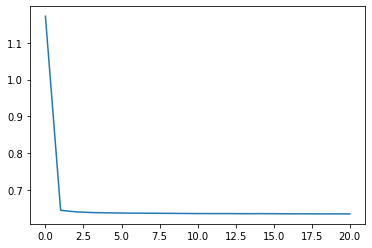

In [62]:
plt.plot(model.history.history['loss'])

In [12]:
1!=0

True